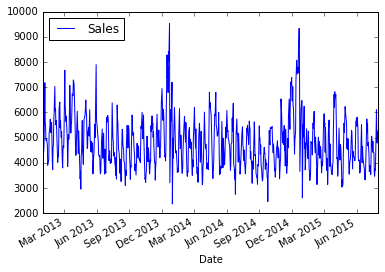

In [96]:
import pandas as pd
import numpy as np

%matplotlib inline

# Load the data and set the DateTime index
data = pd.read_csv('../assets/dataset/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter to Store 1
store1_data = data[data.Store == 1]

# Filter to open days
store1_open_data = store1_data[store1_data.Open==1]

# Plot the sales over time
store1_open_data[['Sales']].plot()

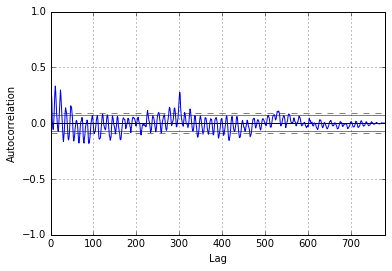

In [97]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(store1_open_data.Sales)

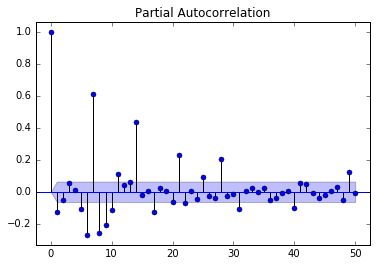

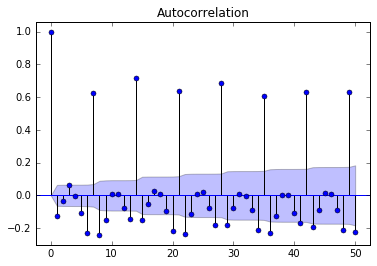

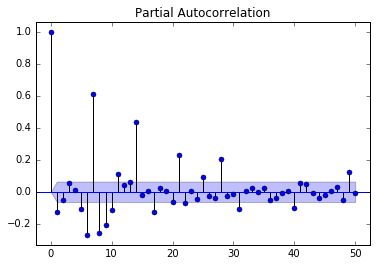

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(store1_data.Sales, lags=50)
plot_pacf(store1_data.Sales, lags=50)

In [105]:
from statsmodels.tsa.arima_model import ARMA
store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(2, 0)   Log Likelihood               -6267.032
Method:                       css-mle   S.D. of innovations            738.800
Date:                Wed, 18 May 2016   AIC                          12542.063
Time:                        20:11:44   BIC                          12560.705
Sample:                    07-31-2015   HQIC                         12549.233
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.3980     85.262     55.856      0.000      4595.287  4929.509
ar.L1.Sales     0.6634      0.036     18.537      0.000         0.593     0.734
ar.L2.Sales     0.0275      0.036      0.767      0.443        -0.043     0.098
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4235           +0.0000j            1.4235            0.0000
AR.2          -25.5833           +0.0000j           25.5833            0.5000
-----------------------------------------------------------------------------
"""

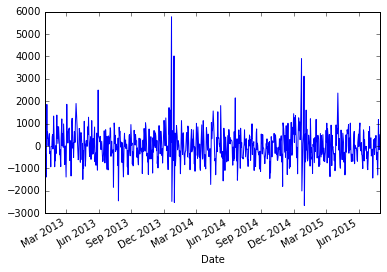

In [106]:
model.resid.plot()

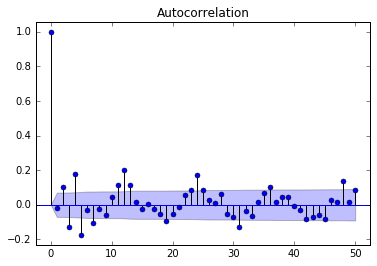

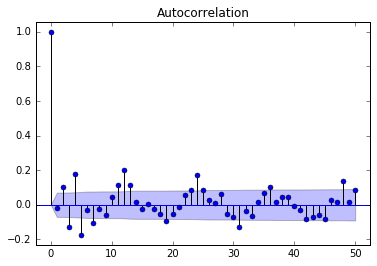

In [116]:
plot_acf(model.resid, lags=50)


In [32]:
model = ARMA(store1_sales_data, (1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Wed, 18 May 2016   AIC                          12542.222
Time:                        14:44:07   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.5214     84.702     56.227      0.000      4596.509  4928.534
ar.L1.Sales     0.6979      0.035     20.095      0.000         0.630     0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514        -0.118     0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0022           +0.0000j           34.0022            0.0000
-----------------------------------------------------------------------------
"""

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(store1_sales_data, (1, 0, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Wed, 18 May 2016   AIC                          12542.222
Time:                        14:47:35   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.5214     84.702     56.227      0.000      4596.509  4928.534
ar.L1.Sales     0.6979      0.035     20.095      0.000         0.630     0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514        -0.118     0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0022           +0.0000j           34.0022            0.0000
-----------------------------------------------------------------------------
"""

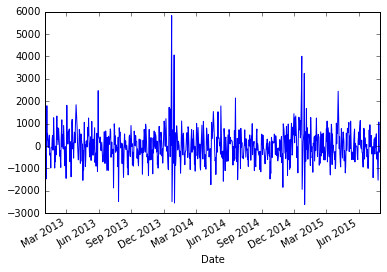

In [115]:
model = ARIMA(store1_sales_data, (1, 1, 1)).fit()
model.summary()
model.resid.plot()

In [117]:
model = ARIMA(store1_sales_data, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6313.616
Method:                       css-mle   S.D. of innovations            792.680
Date:                Wed, 18 May 2016   AIC                          12633.233
Time:                        20:31:02   BIC                          12647.211
Sample:                    07-30-2015   HQIC                         12638.609
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.2161     24.028      0.009      0.993       -46.877    47.309
ar.L1.D.Sales    -0.1815      0.035     -5.150      0.000        -0.251    -0.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.5103           +0.0000j            5.5103            0.5000
-----------------------------------------------------------------------------
"""

In [36]:
store1_sales_data.Sales.diff(1).autocorr(1)

-0.18144101447610667

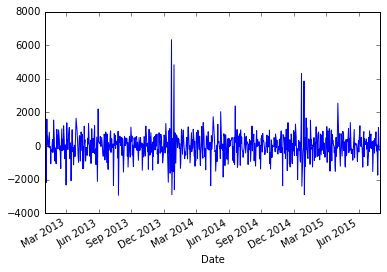

In [37]:
store1_sales_data.Sales.diff(1).plot()

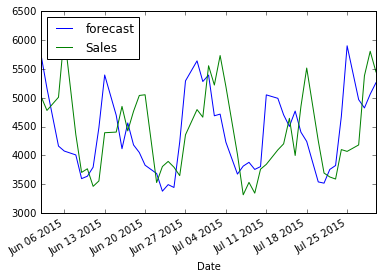

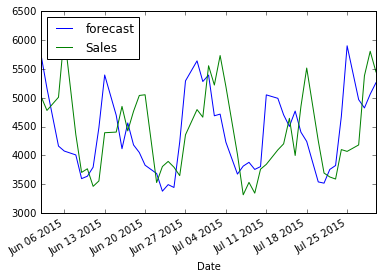

In [118]:
model.plot_predict(1, 50)

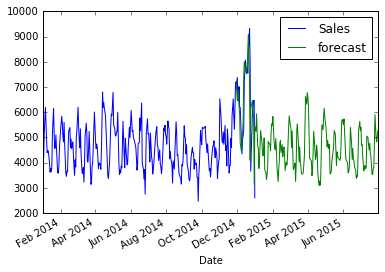

In [119]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = store1_sales_data['2014'].plot(ax=ax)
fig = model.plot_predict(1, 200, ax=ax, plot_insample=False)

In [57]:
#model = ARIMA(store1_sales_data, (7, 1, 2)).fit()
#model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -6221.636
Method:                       css-mle   S.D. of innovations            703.783
Date:                Wed, 18 May 2016   AIC                          12465.272
Time:                        15:01:37   BIC                          12516.524
Sample:                    07-30-2015   HQIC                         12484.984
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.6862      4.555      0.151      0.880        -8.241     9.613
ar.L1.D.Sales     0.8404      0.211      3.982      0.000         0.427     1.254
ar.L2.D.Sales    -0.1503      0.145     -1.038      0.300        -0.434     0.134
ar.L3.D.Sales    -0.1831      0.046     -3.976      0.000        -0.273    -0.093
ar.L4.D.Sales     0.2557      0.060      4.296      0.000         0.139     0.372
ar.L5.D.Sales    -0.3381      0.067     -5.018      0.000        -0.470    -0.206
ar.L6.D.Sales     0.0691      0.074      0.931      0.352        -0.076     0.215
ar.L7.D.Sales    -0.0656      0.050     -1.325      0.185        -0.163     0.031
ma.L1.D.Sales    -1.1350      0.209     -5.443      0.000        -1.544    -0.726
ma.L2.D.Sales     0.2373      0.197      1.203      0.229        -0.149     0.624
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2128           -0.0000j            1.2128           -0.5000
AR.2            1.0141           -0.4950j            1.1285           -0.0723
AR.3            1.0141           +0.4950j            1.1285            0.0723
AR.4           -0.1357           -1.7545j            1.7597           -0.2623
AR.5           -0.1357           +1.7545j            1.7597            0.2623
AR.6            0.2547           -1.7666j            1.7848           -0.2272
AR.7            0.2547           +1.7666j            1.7848            0.2272
MA.1            1.1647           +0.0000j            1.1647            0.0000
MA.2            3.6179           +0.0000j            3.6179            0.0000
-----------------------------------------------------------------------------
"""

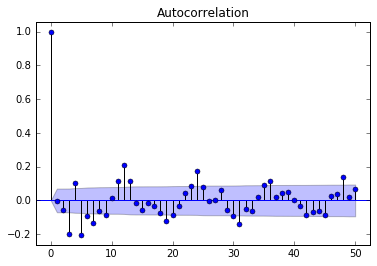

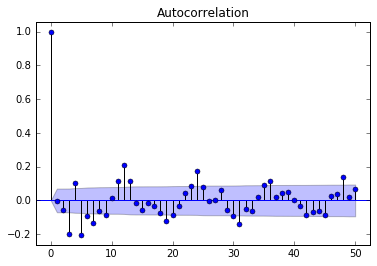

In [120]:
plot_acf(model.resid, lags=50)
